#           Particle Physics - Statistics - Higgs Project

#### MOISES BARBERA RAMOS - 27/11/2019

LinkedIn: https://www.linkedin.com/in/moises-barbera-ramos-8a3848164/

Github: https://github.com/MoisesBarbera

In [1]:
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.io import  loadmat
from scipy.stats import norm, poisson, chi2
from scipy.optimize import curve_fit
from pylab import rcParams

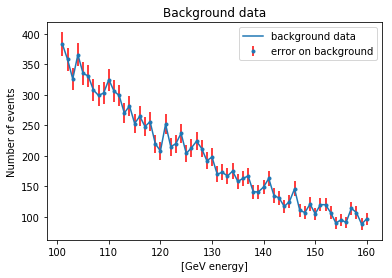

In [2]:
# Load ATALAS_DATA1.mat data
W = loadmat('ATLAS_DATA1.mat' , mat_dtype = True , squeeze_me = True)
locals().update({k : W[k] for k in ['n', 'e']})

n_err = n**0.5

# Ploting ATLAS data with error bars indicated
plt.plot(e, n, label = 'background data')
plt.errorbar(e, n, n_err, ecolor = 'r', fmt = '.', label = 'error on background')

plt.xlabel('[GeV energy]')
plt.ylabel('Number of events')
plt.title('Background data')
plt.legend()
plt.show()

In [3]:
# Define model for the data as f_bkg = n_exp = a_bkg · exp(b_bkg·e)

def bg(e, a, b):           # e is the energy, a and b are parameters for the background
    return a*np.exp(b * e)

a = 350    # guessed value of a
b = 0.05   # guessed value of b

sol, covariance = curve_fit(bg, e, n, p0 = [a, b])
fit_a = sol[0]  # fitted value of a
fit_b = sol[1]  # fitted value of b
print('Fit value for a is: {:.3f}, and fit value for b is: {:.3f} '.format(fit_a, fit_b))

Fit value for a is: 4119.462, and fit value for b is: -0.024 


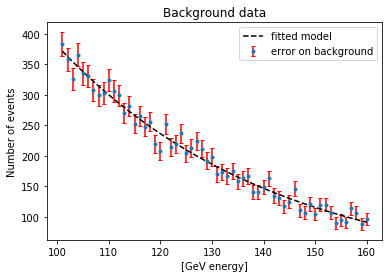

In [4]:
# Plotting the fitted function against the data
plt.errorbar(e, n, n_err, capsize =2,ecolor = 'r', fmt='.', label = 'error on background')
plt.plot(e, bg(e, fit_a, fit_b), 'k--', label ='fitted model')

plt.xlabel('[GeV energy]')
plt.ylabel('Number of events')
plt.title('Background data')
plt.legend()
plt.show()

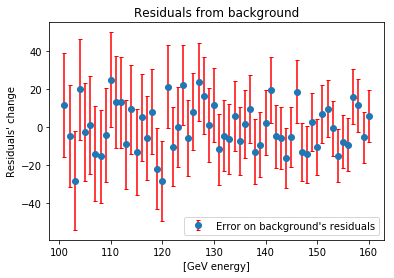

In [5]:
# Calculation of the residuals n - n_exp
resid = n - bg(e, fit_a, fit_b)

bg_err = (bg(e, fit_a, fit_b))**0.5

resid_err = ((n_err**2) + (bg_err**2))**0.5

# Plotting residuals
plt.errorbar(e, resid, resid_err, capsize =2,ecolor = 'r', fmt='o', label = 'Error on background\'s residuals' )

plt.xlabel('[GeV energy]')
plt.ylabel('Residuals\' change')
plt.title('Residuals from background')
plt.legend()
plt.show()

In [6]:
# Calculating the test statistic χ2, the reduced χ2 and the probability P(x > χ2)
chi_sq = sum(((n - bg(e, fit_a, fit_b))**2) / bg(e, fit_a, fit_b))

dp = len(n) # data points in set
df = 2      # degrees of freedom assigned
NDF = dp - df
reduced_chi = chi_sq / NDF

probability = 1 - chi2.cdf(chi_sq, NDF)

print('Chi square value is: {:14.3f}'.format(chi_sq))
print('Reduced Chi square value is: {:6.3f}'.format(reduced_chi))
print('Probability is: {:19.3f}%'.format(probability))

Chi square value is:         51.786
Reduced Chi square value is:  0.893
Probability is:               0.704%


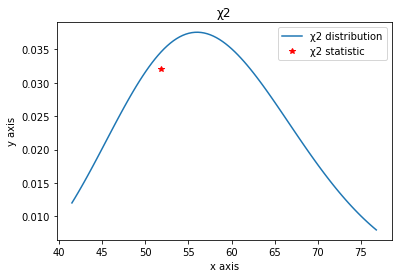

In [7]:
# Plotting the χ2 PDF with the test statistic
x = np.linspace(chi2.ppf(0.05, NDF), chi2.ppf(0.95, NDF), 100)
plt.plot(x, chi2.pdf(x, NDF), linestyle = '-', label = 'χ2 distribution')

plt.plot(chi_sq, 0.032, 'r*', label = 'χ2 statistic')

plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('χ2')
plt.legend()
plt.show()

#### What is the significance in terms of sigma?

χ2 statistic is not within one sigma of the χ2 distribution so it is outside the 68% probability

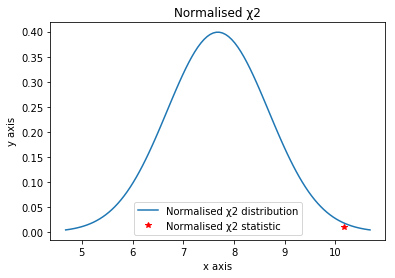

The value of sqrt(2·χ^2) = 10.177


In [8]:
# The χ2 distribution tends to a Gaussian (mean and variance) for a large number of degrees of freedom (NDF = ν)
# but has to be very large for this to be a good approximation.

# Calculating sqrt(2χ2) with mean sqrt(2v-1)
chi_sq2 = (2*chi_sq)**0.5

var = 1            # variance = 1 if v ≥ 30
v = 30             # consider v = 30 for variance 1

mu = (2*v-1)**0.5  # mean    
sigma = var**0.5   # Standard deviation

# Plotting the normalised χ2 PDF with the normalised test statistic
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma), label = 'Normalised χ2 distribution')
        
plt.plot(chi_sq2, 0.01, 'r*', label = 'Normalised χ2 statistic')

plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Normalised χ2')
plt.legend()
plt.show()

print('The value of sqrt(2·χ^2) = {:.3f}'.format(chi_sq2))

#### What is the significance in terms of sigma?

As seen on the graph we can state that the normalised χ2 statistic is based outside 2 sigma so there is a little bit more than 2% chance of finding it in the normalised χ2 distribution

#### What can you conclude?

The normalised data suggests a low level of compatiblity between each other meaning we should usedd the previous not normalised data set to represent the background.

In [9]:
#Total number of events in set

Tot_events = sum(bg(e, fit_a, fit_b))
print('Total number of events equals: {:.3f}'.format(Tot_events))

Total number of events equals: 12005.242


## Dataset 2

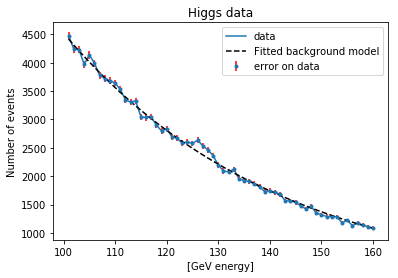

In [10]:
# Load ATALAS_DATA2.mat data
W = loadmat('ATLAS_DATA2.mat' , mat_dtype = True , squeeze_me = True)
locals().update({k : W[k] for k in ['n', 'e']})

n_err = n**0.5

plt.plot(e, n, label = 'data')
plt.errorbar(e, n, n_err, ecolor = 'r', fmt = '.', label = 'error on data')

# Normalise background model
# as both data-sets have the same energy range and the same bin width
# Normalise amplitude parameter
a_norm = fit_a*sum(n)/Tot_events

# Plotting normalised background model
plt.plot(e, bg(e, a_norm, fit_b), 'k--', label = 'Fitted background model')

plt.xlabel('[GeV energy]')
plt.ylabel('Number of events')
plt.title('Higgs data')
plt.legend()
plt.show()

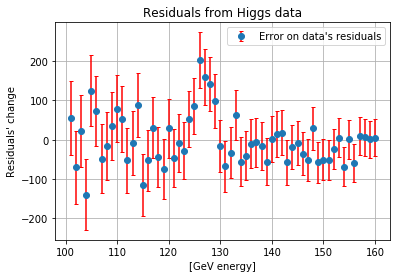

In [11]:
# Calculation of the residuals n - n_exp
resid = n - bg(e, a_norm, fit_b)

bg_err = (bg(e, a_norm, fit_b))**0.5

resid_err = ((n_err**2) + (bg_err**2))**0.5

# Plotting residuals
plt.errorbar(e, resid, resid_err, capsize =2,ecolor = 'r', fmt='o', label = 'Error on data\'s residuals')

plt.xlabel('[GeV energy]')
plt.ylabel('Residuals\' change')
plt.title('Residuals from Higgs data')
plt.legend()
plt.grid()

In [12]:
# Calculating the test statistic χ2, the reduced χ2 and the probability P(x > χ2)
chi_sq = sum(((n - bg(e, a_norm, fit_b))**2) / bg(e, a_norm, fit_b))

dp = len(n)     # data points in set
df = 2          # degrees of freedom assigned
NDF = dp - df
reduced_chi = chi_sq / NDF

probability = 1 - chi2.cdf(chi_sq, NDF)

print('Chi square value is: {:14.3f}'.format(chi_sq))
print('Reduced Chi square value is: {:6.3f}'.format(reduced_chi))
print('Probability is: {:19.3f}%'.format(probability))

Chi square value is:        101.023
Reduced Chi square value is:  1.742
Probability is:               0.000%


#### Significance of result in terms of sigma?

The high chi square value suggests that the data is incompatible with the background exponential

#### What can you conclude?

This means that the data is not compatible with a simple decaying exponential and suggests the presence of something else a part from the background. In our case, this identifies the presence of the Higgs bump.

In [13]:
# Defined a new model containing the exponential background + the Gaussian peak observed in the data
def gaussian(x, A, mu, sigma, a, b):
    return A*np.exp(-((x-mu)**2) / (2*(sigma**2))) + a*np.exp(e*b)

# Guessed values for [A, mu, sigma, a, b]
A = 250     
mu = 125
sigma = 2.5 
a = 4000
b = -0.029

solu, cov = curve_fit(gaussian, e, n, p0 = [A, mu, sigma, a, b])

# Fitted values for [A, mu, sigma, a, b]
A_fit = solu[0]
mu_fit = solu[1]
sigma_fit = solu [2]
a_fit = solu[3]
b_fit = solu[4]

print('Fit value for A is: {:.3f}, for mu is: {:.3f}, for sigma is: {:.3f}, for a is: {:.3f} and for b is: {:.3f} '
      .format(A_fit, mu_fit, sigma_fit, a_fit, b_fit))



Fit value for A is: 211.524, for mu is: 126.740, for sigma is: -1.622, for a is: 51040.006 and for b is: -0.024 


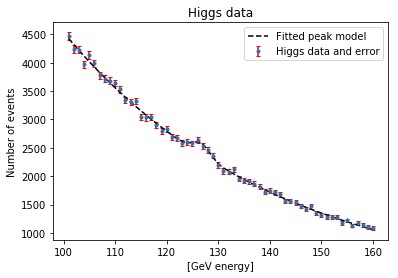

In [14]:
# Plotting the new fitted model with the gaussian peak to the data
plt.errorbar(e, n, n_err, capsize =2,ecolor = 'r', fmt='.', label = 'Higgs data and error')
plt.plot(e,  gaussian(e, A_fit, mu_fit, sigma_fit, a_fit, b_fit), 'k--', label = 'Fitted peak model')

plt.xlabel('[GeV energy]')
plt.ylabel('Number of events')
plt.title('Higgs data')
plt.legend()
plt.show()

In [15]:
# Calculating the test statistic χ2, the reduced χ2 and the probability P(x > χ2)
chi_sq = sum(((n - (gaussian(e, A_fit, mu_fit, sigma_fit, a_fit, b_fit)))**2) /
             gaussian(e, A_fit, mu_fit, sigma_fit, a_fit, b_fit))

dp = len(n) # data points in set
df = 2      # degrees of freedom assigned
NDF = dp - df
reduced_chi = chi_sq / NDF

p_val = 1 - chi2.cdf(chi_sq, NDF)

print('Chi square value is: {:14.3f}'.format(chi_sq))
print('Reduced Chi square value is: {:6.3f}'.format(reduced_chi))
print('Probability is: {:19.3f}%'.format(p_val))

Chi square value is:         49.951
Reduced Chi square value is:  0.861
Probability is:               0.765%


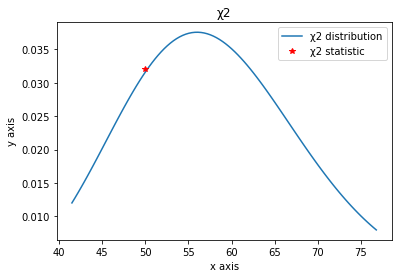

In [16]:
# Plotting the χ2 PDF with the test statistic
x = np.linspace(chi2.ppf(0.05, NDF), chi2.ppf(0.95, NDF), 100)
plt.plot(x, chi2.pdf(x, NDF), linestyle = '-', label = 'χ2 distribution')

plt.plot(chi_sq, 0.032, 'r*', label = 'χ2 statistic')

plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('χ2')
plt.legend()
plt.show()

#### Significance of result in terms of sigma?
The value for Chi Squared has been reduced by a half with our new model compared to the exponential background model used previously. Also suggests that the my new model is betterr fitted for this dataset and, following our findings for χ2 statistic in the background model, the similarities in probability suggest that this new χ2 statistic is inside 2 sigma so outside the 68% probability

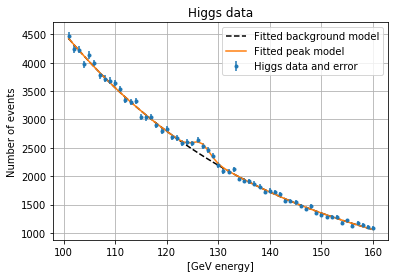

In [17]:
# Plotting the data, the fitted background and my gaussian peak model
plt.plot(e, bg(e, a_fit, b_fit), 'k--', label = 'Fitted background model')

plt.errorbar(e, n, n_err, fmt='.', label = 'Higgs data and error')
plt.plot(e, gaussian(e, A_fit, mu_fit, sigma_fit, a_fit, b_fit), label = 'Fitted peak model')

plt.xlabel('[GeV energy]')
plt.ylabel('Number of events')
plt.title('Higgs data')
plt.legend()
plt.grid()

In [18]:
n_exp = gaussian(e, A_fit, mu_fit, sigma_fit, a_fit, b_fit)
n_bkg = bg(e, a_fit, b_fit)
n_peak = gaussian(e, A_fit, mu_fit, sigma_fit, a_fit, b_fit) - bg(e, a_fit, b_fit)
bkg_err = (n_bkg)**0.5                   # Error on n_bkg
err = ((n_err**2) + (bkg_err**2))**0.5   # Error on n - n_bkg

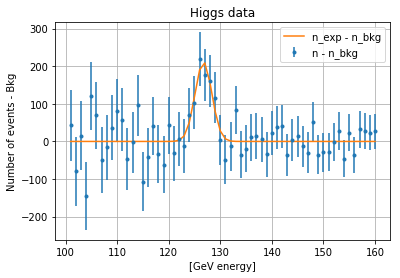

In [19]:
# Calculating and plotting n - n_bkg and n_exp - n_bkg
plt.errorbar(e, (n - n_bkg), err, fmt = '.', label = 'n - n_bkg')
plt.plot(e, (n_exp - n_bkg), label = 'n_exp - n_bkg')

plt.xlabel('[GeV energy]')
plt.ylabel('Number of events - Bkg')
plt.title('Higgs data')
plt.legend()
plt.grid()

In [20]:
# Calculations to find value of Higgs from Events -Bkg

# Energy for max Num of events - Bkg
calc = (n - n_bkg)                       # State the data we are using
calc_1 = list(calc)                      # Transform array into list
Higgs = e[calc_1.index(max(calc_1))-1]   # Select the value of the energy for which the number of events is maximum, we subtract 1 as indexes start at 0 not 1
print('Energy value of the Higgs: {:17.3f}'.format(Higgs))
print('')

#Finding sigma of gaussian peak
# Mean of the gaussian peak (between energies 120 and 133 approx)
e_list = list(e)                                             # Transform array of enery into list
peak_data = calc_1[e_list.index(119) : e_list.index(132)]    # Select all the signals recorded between the values of energy where we find a peak
sigma_peak = sum(peak_data) / len(peak_data)                 # calculate the mean of that data
print('Value of sigma at gaussian pean: {:11.3f}'.format(sigma_peak))
print('')

# N - Estimate number of signal events
signal_events = sum(gaussian(e, A_fit, mu_fit, sigma_fit, a_fit, b_fit))   # Estimate the total number of signal events with our model 
print('Estimate number of signal events: {:.3f}'.format(signal_events))
print('')

# Error on the Higgs
err_Higgs = sigma_peak / (signal_events)**0.5       # Use delta(mu) equation to find error on Higgs
print('Error on Higgs: {:28.3f}'.format(err_Higgs))
print('')

print('Higgs value: {:26.3f} +/- {:.3f} GeV/c'.format(Higgs, err_Higgs))

Energy value of the Higgs:           125.000

Value of sigma at gaussian pean:      57.225

Estimate number of signal events: 142628.092

Error on Higgs:                        0.152

Higgs value:                    125.000 +/- 0.152 GeV/c


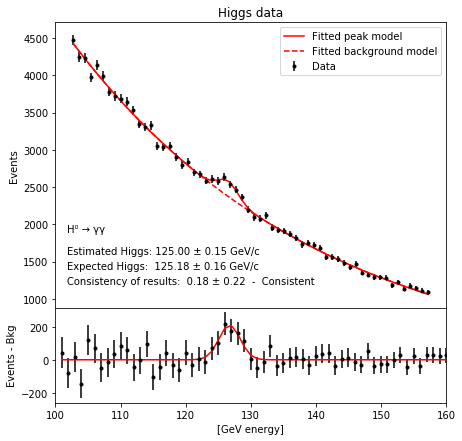

In [21]:
# Showing the plot with the data from datat 2, with the fitted background and my fitted  model.
# Also showing the background residuals and n_exp - n_bkg
# Also shows the calculated values for Higgs, the  real valu for Higgs and the consistency between them.
rcParams['figure.figsize'] = 7, 7

f, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})

# Data, fitted background and my model
ax1.plot(e, gaussian(e, A_fit, mu_fit, sigma_fit, a_fit, b_fit), 'r-', label = 'Fitted peak model')
ax1.errorbar(e, n, n_err, color = 'k',ecolor = 'k', fmt='.', label = 'Data')
ax1.plot(e, bg(e, a_fit, b_fit), 'r--', label = 'Fitted background model')

ax1.set_ylabel('Events')
ax1.set_title('Higgs data')
ax1.legend(loc = 'upper right')

# Background residuals and n_exp - n_bkg
ax2.errorbar(e, (n - n_bkg), err, color = 'k', ecolor = 'k', fmt = '.')
ax2.plot(e, (n_exp - n_bkg), 'r-')

ax2.set_xlim(100,160)
ax2.set_ylabel('Events - Bkg')

plt.xlabel('[GeV energy]')
plt.subplots_adjust(wspace=0, hspace=0)


#Print the event studied
ax1.text(100, 1900, 'H⁰ → γγ ')


#Print Calculated and Expected value of Higgs
ax1.text(100, 1600, 'Estimated Higgs: {:.2f} ± {:.2f} GeV/c'.format(Higgs, err_Higgs))
ax1.text(100, 1400, 'Expected Higgs:  125.18 ± 0.16 GeV/c')

# Consistency of measurement
consis_val = abs(Higgs - 125.18)
consis_err = ((err_Higgs**2) + (0.16**2))**0.5

#Consistent if:

def consistency(val, err):
    if val < 3*err:
        return 'Consistent'
    else:
        return 'Not Consistent'
    return

# Print Consistency    
ax1.text(100, 1200, 'Consistency of results:  {:.2f} ± {:.2f}  -  '.format(consis_val, consis_err) + str(consistency(consis_val, consis_err)))
plt.show()